## CSc 84020 Neural Networks and Deep Learning, Spring 2021
##### Homework 2 (3a)
##### Andrea Ceres and Shao Liu


##### **Load library**

In [ ]:
import glob
import os
import numpy as np
import keras
from keras import layers
from urllib import request
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import pylab
from pandas.plotting import scatter_matrix
from pandas import set_option
import time
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
%matplotlib inline

print(tf.__version__)

2.4.1


##### **Load Data from Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# critters (6 classes)
critters = ['ant', 'bee', 'butterfly', 'mosquito', 'scorpion', 
           'spider']

# birds (6 classes)
birds = ['bird', 'duck', 'flamingo', 'owl', 'parrot', 
           'penguin']

# ocean animals (8 classes)
ocean_animals = ['crab', 'dolphin', 'fish', 'lobster', 'octopus', 
           'sea%20turtle', 'shark', 'whale']

# land mammals (22 classes)
land_mammals = ['bear', 'camel', 'cat', 'cow', 'dog', 
           'elephant', 'giraffe', 'hedgehog', 'horse', 'kangaroo', 
           'lion', 'monkey', 'mouse', 'panda', 'pig', 
           'rabbit', 'raccoon', 'rhinoceros', 'sheep', 'squirrel', 
           'tiger', 'zebra']

# all animals (47 classes)
all_animals = ['ant', 'bat', 'bear', 'bee', 'bird', 
           'butterfly', 'camel', 'cat', 'cow', 'crab', 
           'crocodile', 'dog', 'dolphin', 'duck', 'elephant', 
           'fish', 'flamingo', 'frog', 'giraffe', 'hedgehog', 
           'horse', 'kangaroo', 'lion', 'lobster', 'monkey', 
           'mosquito', 'mouse', 'octopus', 'owl', 'panda', 
           'parrot', 'penguin', 'pig', 'rabbit', 'raccoon', 
           'rhinoceros', 'scorpion', 'sea_20turtle', 'shark', 'sheep', 
           'snail', 'snake', 'spider', 'squirrel',  'tiger', 
           'whale', 'zebra']

In [ ]:
classes = critters
CLASS_SAMPLE_MAX = 25000
DATA_DIR = '/content/drive/My Drive/Colab Notebooks/NNDL/HW2/data/'

In [ ]:
def load_bitmaps(data_dir=DATA_DIR, class_sample_max=CLASS_SAMPLE_MAX):
    class_files = []
    for c in classes:
        print(c, end=' ')
        class_files.append(os.path.join(DATA_DIR, c + '.npy'))
    class_files.sort()
  
    X = np.empty([0,784])
    y = np.empty([0])

    print()
    for id, class_file in enumerate(class_files):
        print(id, end=' ')
        loaded_data = np.load(class_file)
        loaded_data = loaded_data[0:CLASS_SAMPLE_MAX, :]
        labels = np.full(loaded_data.shape[0],id)
        
        X = np.concatenate((X, loaded_data), axis = 0)
        y = np.append(y, labels)

    return X, y

In [ ]:
start = time.time()
X, y = load_bitmaps()
print(f'\nLoading time: %.3f' % int(time.time() - start), 'seconds')
print(X.shape)
print(y.shape)
print(y[-CLASS_SAMPLE_MAX-5:-CLASS_SAMPLE_MAX+5])

ant bee butterfly mosquito scorpion spider 
0 1 2 3 4 5 
Loading time: 1.000 seconds
(150000, 784)
(150000,)
[4. 4. 4. 4. 4. 5. 5. 5. 5. 5.]


##### **Data sample**

ant


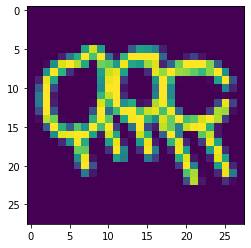

In [ ]:
id = 20000
plt.imshow(X[id].reshape(28,28)) 
print(classes[int(y[id].item())])

In [ ]:
set_option('display.max_columns', 64)
# plt.style.use('seaborn-white')

##### **1. Printing the shape of the data**

In [ ]:
# Create pandas dataframe 
Y = y.reshape(150000,1)
df = np.append(X,Y,1)
df = pd.DataFrame(df)
# 1. Printing the shape of the data
print(df.shape)

(150000, 785)


##### **2. Printing the data**

In [ ]:
print(df.head(20))

    0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   \
0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
11  0.0  0.0  0.0  0.0  0.0 

In [ ]:
# Only show the 28 pixels in center because most of the pixels are zeros in other areas.
features = list(df.columns[391:419])
df_mid = df[features]
print(df_mid)

        391  392    393    394    395    396    397    398    399    400  \
0       0.0  0.0    0.0    0.0  249.0  133.0   75.0  253.0  255.0  237.0   
1       0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2       0.0  0.0   22.0  247.0  140.0    0.0    0.0    0.0    0.0    0.0   
3       0.0  0.0    0.0  123.0  255.0  245.0  238.0  238.0  246.0  233.0   
4       0.0  0.0    0.0  167.0  230.0    4.0    0.0    0.0    0.0    0.0   
...     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
149995  0.0  0.0    0.0   63.0   15.0    0.0    0.0    0.0   22.0  252.0   
149996  0.0  0.0    0.0    0.0    0.0    0.0   69.0  255.0   60.0    0.0   
149997  0.0  0.0  102.0  255.0   73.0   59.0  255.0  210.0  239.0  255.0   
149998  0.0  0.0   21.0  253.0  255.0  255.0  255.0  255.0  173.0    5.0   
149999  0.0  0.0    0.0  219.0  227.0  255.0  238.0  178.0  255.0   94.0   

          401    402    403    404    405    406    407    408    409    410  \
0      

##### **3. Printing the descriptive statistics**

In [ ]:
# 3. Printing the descriptive statistics
print(df.describe())

            0         1         2         3         4         5         6    \
count  150000.0  150000.0  150000.0  150000.0  150000.0  150000.0  150000.0   
mean        0.0       0.0       0.0       0.0       0.0       0.0       0.0   
std         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
min         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
25%         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
50%         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
75%         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
max         0.0       0.0       0.0       0.0       0.0       0.0       0.0   

            7         8         9         10        11        12        13   \
count  150000.0  150000.0  150000.0  150000.0  150000.0  150000.0  150000.0   
mean        0.0       0.0       0.0       0.0       0.0       0.0       0.0   
std         0.0       0.0       0.0       0.0      

In [ ]:
# Show the 28 pixels in center
print(df_mid.describe())

            391       392            393            394            395  \
count  150000.0  150000.0  150000.000000  150000.000000  150000.000000   
mean        0.0       0.0      16.071487      77.873900      89.022967   
std         0.0       0.0      33.096175     104.470091     100.659358   
min         0.0       0.0       0.000000       0.000000       0.000000   
25%         0.0       0.0       0.000000       0.000000       0.000000   
50%         0.0       0.0       0.000000       0.000000      34.000000   
75%         0.0       0.0       5.000000     187.000000     193.000000   
max         0.0       0.0     233.000000     255.000000     255.000000   

                 396            397            398            399  \
count  150000.000000  150000.000000  150000.000000  150000.000000   
mean       93.113167      99.674453     105.749780     111.392773   
std       103.005679     104.218451     104.863114     105.675783   
min         0.000000       0.000000       0.000000       

##### **4. Printing the class distribution**

In [ ]:
# 4. Printing the class distribution
print(df.groupby(784).size())

784
0.0    25000
1.0    25000
2.0    25000
3.0    25000
4.0    25000
5.0    25000
dtype: int64


##### **5. Printing the data types of the features.**

In [ ]:
#  5. Printing the data types of the features.
print(df.dtypes)

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
780    float64
781    float64
782    float64
783    float64
784    float64
Length: 785, dtype: object


##### **6. Printing the Pearson Correlation.**

In [ ]:
# 6. Printing the Pearson Correlation.
# Only use the 28 pixels in center because most of the pixels are zeros in other areas.
features = list(df.columns[391:419])
df_mid = df[features]
print(df_mid.corr(method='pearson'))

     391  392       393       394       395       396       397       398  \
391  NaN  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
392  NaN  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
393  NaN  NaN  1.000000  0.781378  0.135300 -0.040004 -0.057305 -0.060787   
394  NaN  NaN  0.781378  1.000000  0.522337  0.061733 -0.036313 -0.058031   
395  NaN  NaN  0.135300  0.522337  1.000000  0.599488  0.203512  0.077573   
396  NaN  NaN -0.040004  0.061733  0.599488  1.000000  0.659972  0.285539   
397  NaN  NaN -0.057305 -0.036313  0.203512  0.659972  1.000000  0.674497   
398  NaN  NaN -0.060787 -0.058031  0.077573  0.285539  0.674497  1.000000   
399  NaN  NaN -0.043471 -0.046485  0.037201  0.145972  0.307702  0.674939   
400  NaN  NaN -0.015608 -0.021281  0.024619  0.084455  0.163029  0.309816   
401  NaN  NaN  0.005347 -0.004068  0.015873  0.049172  0.095983  0.165679   
402  NaN  NaN  0.011984  0.004523  0.014296  0.031313  0.059169  0.101694   

##### **7. Printing the skewness of the dataset.**

In [ ]:
# 7. Printing the skewness of the dataset (28 attributes in center).
print(df_mid.skew())

391    0.000000
392    0.000000
393    1.958852
394    0.823587
395    0.581306
396    0.504271
397    0.392541
398    0.292173
399    0.202713
400    0.123766
401    0.079506
402    0.063172
403    0.056665
404    0.080748
405    0.119656
406    0.117515
407    0.086738
408    0.076377
409    0.087730
410    0.106146
411    0.155359
412    0.225863
413    0.311649
414    0.421201
415    0.550212
416    0.648557
417    0.918921
418    2.051123
dtype: float64


##### **8. Histograms of all features**

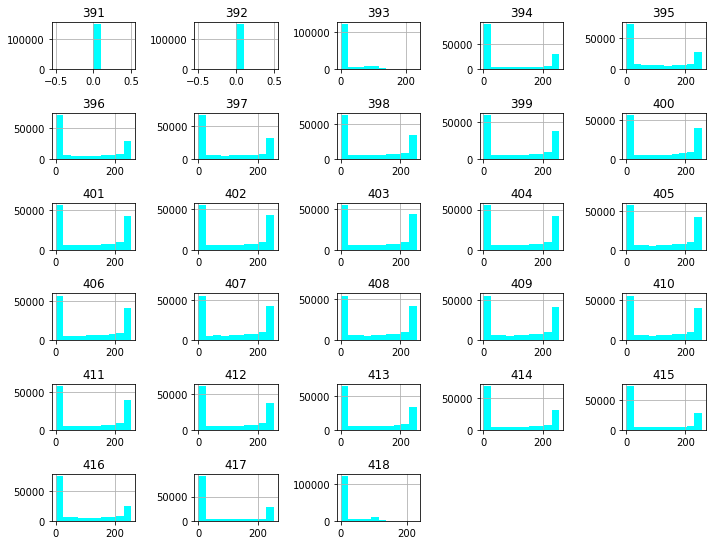

In [ ]:
# 8. Histograms of all features
pylab.rcParams['figure.figsize'] = (10,20)
df_mid.hist(color='cyan', layout=(16,5))
plt.tight_layout()
plt.show()

##### **9. Scatter Matrix**

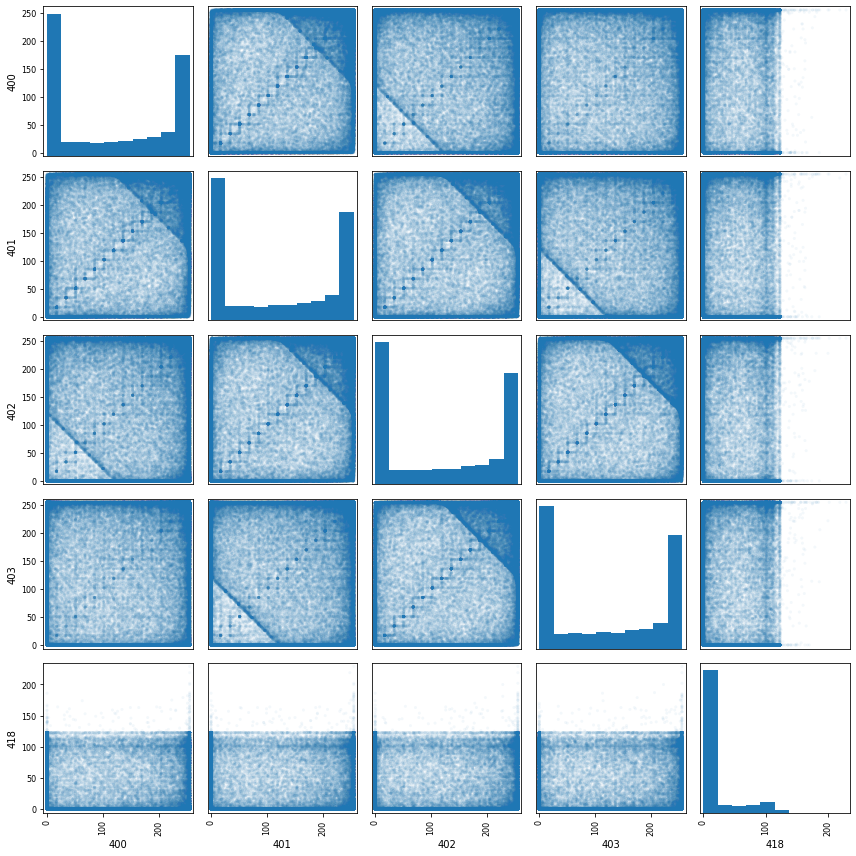

In [ ]:
# 9. Scatter Matrix
pylab.rcParams['figure.figsize'] = (12,12)
scatter_matrix(df_mid[[400,401,402,403,418]],alpha=0.05)
plt.tight_layout()
plt.show()

##### **10. Density plot for each feature.**

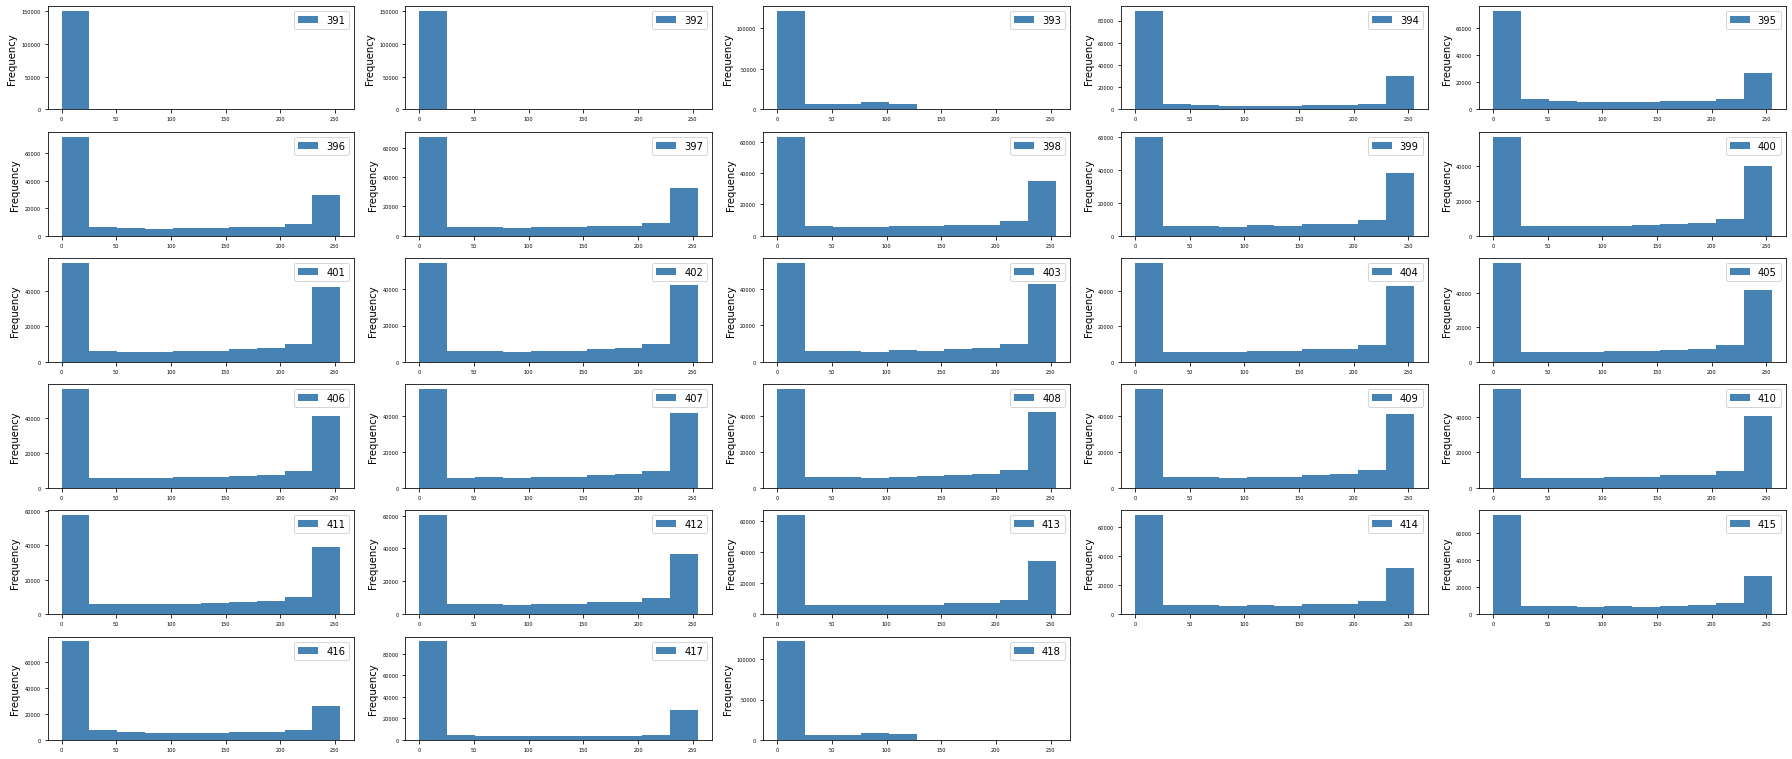

In [ ]:
# 10. Density plot for each feature.
# pylab.rcParams['figure.figsize'] = (10,25)
# print(df_mid)
df_mid.select_dtypes('float').plot(kind='hist', subplots=True, layout=(20,5), figsize=(25,35), sharex=False, sharey = False, fontsize=5, color='steelblue')
plt.tight_layout()
plt.show()

##### **11. Correlation Matrix Plot**

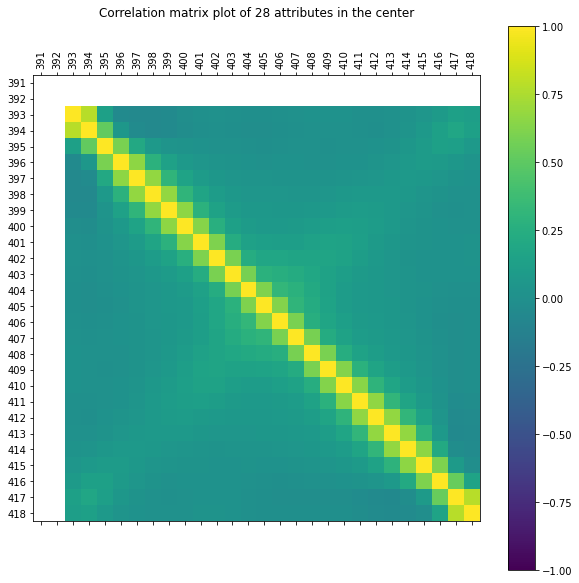

In [ ]:
# 11. Correlation Matrix Plot
pylab.rcParams['figure.figsize'] = (10,10)
correlations = df_mid.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1, cmap='viridis')
fig.colorbar(cax)
ticks = np.arange(0,len(df_mid.columns),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df_mid.columns, rotation=90)
ax.set_yticklabels(df_mid.columns, rotation=0)
plt.title('Correlation matrix plot of 28 attributes in the center\n\n')
plt.show()

##### **12. Classification: split the dataset into train, validate and test**

In [ ]:
# Classification: split the dataset into train, validate and test
test_size = 0.10
val_size = 0.22
seed = 84020
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.22, random_state=seed)

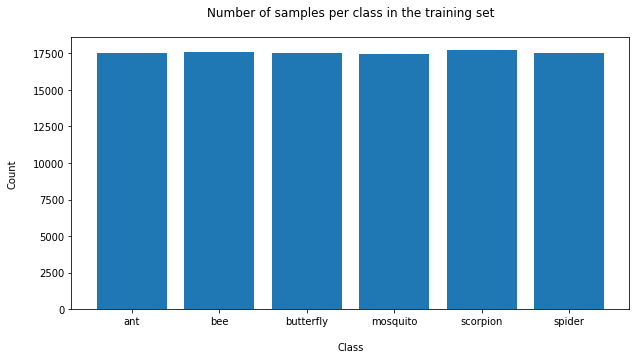

In [ ]:
# Training data
unique, counts = np.unique(Y_train, return_counts=True)
pylab.rcParams['figure.figsize'] = (10,5)
plt.bar(critters, counts)
plt.title('Number of samples per class in the training set\n')
plt.ylabel('Count\n')
plt.xlabel('\nClass')
plt.show()

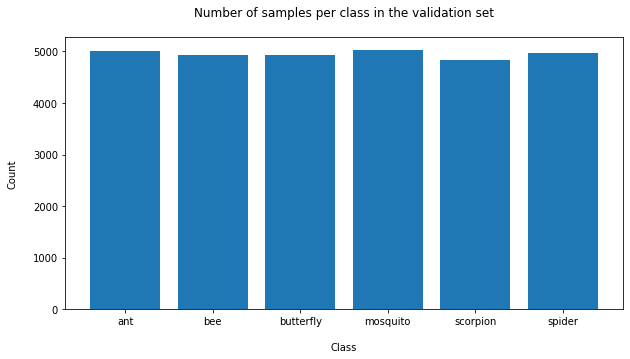

In [ ]:
# Validation data
unique, counts = np.unique(Y_val, return_counts=True)
pylab.rcParams['figure.figsize'] = (10,5)
plt.bar(critters, counts)
plt.title('Number of samples per class in the validation set\n')
plt.ylabel('Count\n')
plt.xlabel('\nClass')
plt.show()

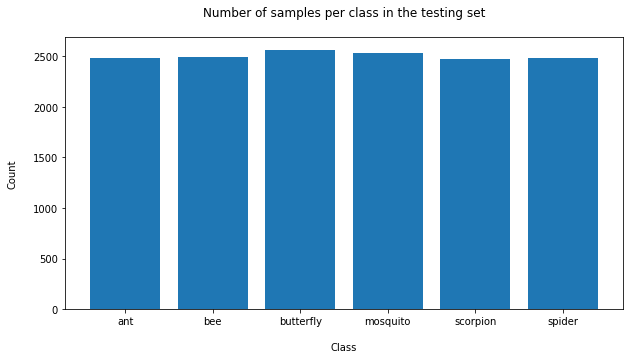

In [ ]:
# Testing data
unique, counts = np.unique(Y_test, return_counts=True)
pylab.rcParams['figure.figsize'] = (10,5)
plt.bar(critters, counts)
plt.title('Number of samples per class in the testing set\n')
plt.ylabel('Count\n')
plt.xlabel('\nClass')
plt.show()

In [ ]:
# Use small set of 6 classes for Spot Check Algorithms
classes = critters
CLASS_SAMPLE_MAX = 1000
DATA_DIR = '/content/drive/My Drive/Colab Notebooks/NNDL/HW2/data/'

In [ ]:
start = time.time()
X, y = load_bitmaps()
print(f'\nLoading time: %.3f' % int(time.time() - start), 'seconds')
print(X.shape)
print(y.shape)
print(y[-CLASS_SAMPLE_MAX-5:-CLASS_SAMPLE_MAX+5])

ant bee butterfly mosquito scorpion spider 
0 1 2 3 4 5 
Loading time: 0.000 seconds
(6000, 784)
(6000,)
[4. 4. 4. 4. 4. 5. 5. 5. 5. 5.]


In [ ]:
test_size = 0.10
val_size = 0.2
seed = 46
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=val_size/(1-test_size), random_state=seed)

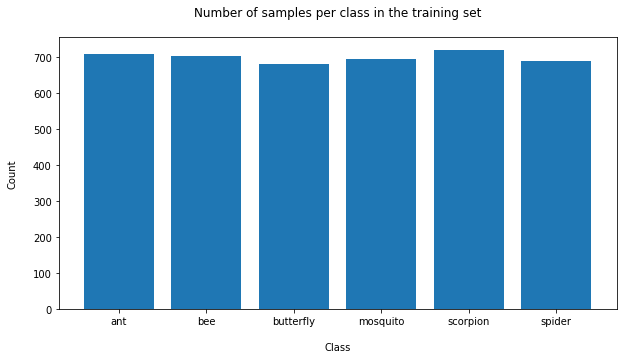

In [ ]:
unique, counts = np.unique(Y_train, return_counts=True)
pylab.rcParams['figure.figsize'] = (10,5)
plt.bar(critters, counts)
plt.title('Number of samples per class in the training set\n')
plt.ylabel('Count\n')
plt.xlabel('\nClass')
plt.show()

##### **13. Spot-Check Algorithms**

In [ ]:
# Spot-Check Algorithms
start = time.time()
models = []
models.append(('LR', LogisticRegression(C=0.01,solver='sag')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=10,random_state=seed, shuffle=True)
  # cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='f1_micro')
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

LR: 0.461667 (0.018302)
LDA: 0.498571 (0.025648)
KNN: 0.645238 (0.023738)
CART: 0.370952 (0.018158)
NB: 0.367381 (0.028652)
SVM: 0.163333 (0.012381)


##### **14. Compare Algorithms**

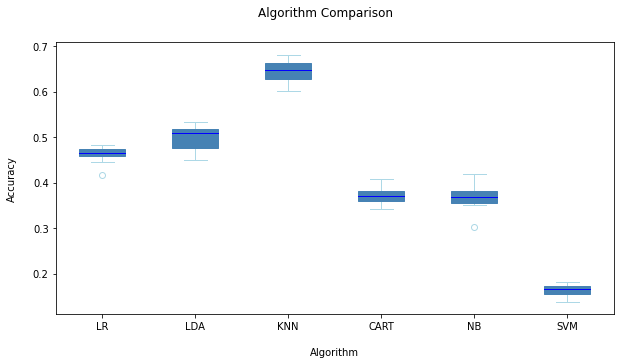

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
c1 = 'steelblue'
c2 = 'blue'
c3 = 'lightblue'
box = plt.boxplot(results, patch_artist=True, 
                     boxprops=dict(facecolor=c1, color=c1), 
                     capprops=dict(color=c3), 
                     whiskerprops=dict(color=c3), 
                     flierprops=dict(color=c3, markeredgecolor=c3), 
                     medianprops=dict(color=c2))
ax.set_xticklabels(names)
plt.ylabel('Accuracy\n')
plt.xlabel('\nAlgorithm')
plt.show()
plt.show()

##### **15. Make predictions on validation dataset**

In [ ]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
pred_knn = knn.predict(X_val)
print('accuracy:',accuracy_score(Y_val, pred_knn))
print('confusion matrix:\n',confusion_matrix(Y_val, pred_knn))

accuracy: 0.6716666666666666
confusion matrix:
 [[139   8   1  21  15  11]
 [ 32 125   9  11  14   8]
 [ 11  17 174   5   4   4]
 [ 47  15   5 105   9  23]
 [ 37  14   0  15 115   5]
 [ 21   9   2  17   4 148]]


##### **16. Classification report**

In [ ]:
print('classification report:\n', classification_report(Y_val, pred_knn))

classification report:
               precision    recall  f1-score   support

         0.0       0.48      0.71      0.58       195
         1.0       0.66      0.63      0.65       199
         2.0       0.91      0.81      0.86       215
         3.0       0.60      0.51      0.56       204
         4.0       0.71      0.62      0.66       186
         5.0       0.74      0.74      0.74       201

    accuracy                           0.67      1200
   macro avg       0.69      0.67      0.67      1200
weighted avg       0.69      0.67      0.68      1200

